In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate
house_price = pd.read_csv(r'C:\Users\14699\Downloads\realtor-data_old.csv')

In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402159 entries, 0 to 402158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        402159 non-null  object 
 1   price         402159 non-null  float64
 2   bed           314887 non-null  float64
 3   bath          316400 non-null  float64
 4   acre_lot      326858 non-null  float64
 5   full_address  402159 non-null  object 
 6   street        401962 non-null  object 
 7   city          402107 non-null  object 
 8   state         402159 non-null  object 
 9   zip_code      401962 non-null  float64
 10  house_size    318977 non-null  float64
 11  sold_date     137227 non-null  object 
dtypes: float64(6), object(6)
memory usage: 36.8+ MB


In [6]:
#percentage of missing values
house_price.isnull().sum().sum()/house_price.size * 100

12.368491069452629

In [7]:
#shape of the data
house_price.shape

(402159, 12)

In [8]:
#numer of missing values per column
house_price.isna().sum()

status               0
price                0
bed              87272
bath             85759
acre_lot         75301
full_address         0
street             197
city                52
state                0
zip_code           197
house_size       83182
sold_date       264932
dtype: int64

In [9]:
#dropping sold date as it will not be used further in any calculations
house =  house_price.drop(['sold_date'],1)

In [10]:
#percentage of missing columns
house.isnull().sum().sum()/house.size * 100

7.50404238576827

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402159 entries, 0 to 402158
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        402159 non-null  object 
 1   price         402159 non-null  float64
 2   bed           314887 non-null  float64
 3   bath          316400 non-null  float64
 4   acre_lot      326858 non-null  float64
 5   full_address  402159 non-null  object 
 6   street        401962 non-null  object 
 7   city          402107 non-null  object 
 8   state         402159 non-null  object 
 9   zip_code      401962 non-null  float64
 10  house_size    318977 non-null  float64
dtypes: float64(6), object(5)
memory usage: 33.8+ MB


In [12]:
#checking for unique statuses
house.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

In [13]:
#checking for unique cities
house.city.unique()

array(['Adjuntas', 'Juana Diaz', 'Ponce', ..., 'Poughkeepsie', 'Ansonia',
       'Shelton'], dtype=object)

In [14]:
#checking for unique states
house.state.unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia'], dtype=object)

In [15]:
#dropping duplicates
house.drop_duplicates()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
402136,for_sale,599900.0,4.0,3.0,1.13,"15 Ridgewood Club Rd, Prospect, CT, 06712",15 Ridgewood Club Rd,Prospect,Connecticut,6712.0,2600.0
402137,for_sale,599900.0,4.0,3.0,1.13,"19 Ridgewood Club Rd, Prospect, CT, 06712",19 Ridgewood Club Rd,Prospect,Connecticut,6712.0,2600.0
402138,for_sale,619900.0,4.0,3.0,1.13,"24 Ridgewood Club Rd, Prospect, CT, 06712",24 Ridgewood Club Rd,Prospect,Connecticut,6712.0,2600.0
402139,for_sale,699999.0,4.0,3.0,0.75,"265 S Brooksvale Rd, Cheshire, CT, 06410",265 S Brooksvale Rd,Cheshire,Connecticut,6410.0,2340.0


In [16]:
#removing duplicated addresses
house.duplicated(subset="full_address")
house.drop_duplicates(subset=['full_address'], inplace = True)

In [17]:
#no duplicates in data
house.shape

(36488, 11)

In [18]:
#for dealing with missing values
columns_missing = ['bed','bath','acre_lot','house_size']

In [19]:
#grouping by city and dealing with missing values by taking their average
house[columns_missing] = house.groupby("city")[columns_missing].transform(lambda x: x.fillna(x.mean()))

In [20]:
house.isnull().sum() 

status            0
price             0
bed             189
bath            227
acre_lot         83
full_address      0
street           61
city             16
state             0
zip_code         28
house_size      179
dtype: int64

In [21]:
#grouping by state and dealing with missing values by taking their average
house[columns_missing] = house.groupby("state")[columns_missing].transform(lambda x: x.fillna(x.mean()))

In [22]:
house.isnull().sum() 

status           0
price            0
bed              4
bath             4
acre_lot         1
full_address     0
street          61
city            16
state            0
zip_code        28
house_size       4
dtype: int64

In [23]:
#dropping remaining rows with missing values. 
house.dropna(inplace=True)

In [24]:
house.isnull().sum() 

status          0
price           0
bed             0
bath            0
acre_lot        0
full_address    0
street          0
city            0
state           0
zip_code        0
house_size      0
dtype: int64

In [25]:
#rounding up no. of bedrooms and bathrooms
bed_bath = ['bed','bath']
house[bed_bath] = house[bed_bath].round()

In [26]:
#limiting the maximum no. of beds to 50 and bathrooms to 30. Anything beyond 
#will be considered an outlier

house=house[house['bed']<=50]
house=house[house['bath']<=30]
house=house.reset_index(drop=True)
house

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.000000
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.000000
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.000000
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.000000
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,2004.533333
...,...,...,...,...,...,...,...,...,...,...,...
36382,for_sale,599900.0,4.0,3.0,1.13,"15 Ridgewood Club Rd, Prospect, CT, 06712",15 Ridgewood Club Rd,Prospect,Connecticut,6712.0,2600.000000
36383,for_sale,599900.0,4.0,3.0,1.13,"19 Ridgewood Club Rd, Prospect, CT, 06712",19 Ridgewood Club Rd,Prospect,Connecticut,6712.0,2600.000000
36384,for_sale,619900.0,4.0,3.0,1.13,"24 Ridgewood Club Rd, Prospect, CT, 06712",24 Ridgewood Club Rd,Prospect,Connecticut,6712.0,2600.000000
36385,for_sale,699999.0,4.0,3.0,0.75,"265 S Brooksvale Rd, Cheshire, CT, 06410",265 S Brooksvale Rd,Cheshire,Connecticut,6410.0,2340.000000


In [27]:
house.shape

(36387, 11)

In [28]:
house.index = np.arange(house.index.size)

In [29]:
house.head(-20)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.000000
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.000000
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.000000
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.000000
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,2004.533333
...,...,...,...,...,...,...,...,...,...,...,...
36362,for_sale,225000.0,3.0,2.0,0.19,"79 Smith St, Derby, CT, 06418",79 Smith St,Derby,Connecticut,6418.0,1368.000000
36363,for_sale,539900.0,4.0,3.0,1.45,"27 Barberry Ln, Woodbridge, CT, 06525",27 Barberry Ln,Woodbridge,Connecticut,6525.0,2150.000000
36364,for_sale,394900.0,3.0,3.0,0.29,"3 Sobin Dr, Ansonia, CT, 06401",3 Sobin Dr,Ansonia,Connecticut,6401.0,1500.000000
36365,for_sale,299900.0,3.0,2.0,0.36,"23 David Humphrey Rd, Derby, CT, 06418",23 David Humphrey Rd,Derby,Connecticut,6418.0,1152.000000


In [30]:
house.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,3.638700e+04,36387.000000,36387.000000,36387.000000,36387.000000,3.638700e+04
mean,6.119961e+05,3.469179,2.543821,24.257087,3977.075467,2.307112e+03
std,1.235525e+06,1.637169,1.376824,1060.529329,2750.942932,8.373990e+03
min,1.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,1.745000e+05,3.000000,2.000000,0.250000,2128.000000,1.350000e+03
50%,3.399000e+05,3.000000,2.000000,0.920000,3257.000000,1.927744e+03
75%,6.190000e+05,4.000000,3.000000,3.626667,5751.000000,2.599727e+03
max,6.000000e+07,49.000000,30.000000,100000.000000,99999.000000,1.450112e+06


In [31]:
house.shape

(36387, 11)

In [32]:
house.isnull().sum() 

status          0
price           0
bed             0
bath            0
acre_lot        0
full_address    0
street          0
city            0
state           0
zip_code        0
house_size      0
dtype: int64

In [33]:
# Standardization of numerical variables

scaled= StandardScaler()
house['price_std'] = scaled.fit_transform(house[['price']])
house['bed_std'] = scaled.fit_transform(house[['bed']])
house['bath_std'] = scaled.fit_transform(house[['bath']])
house['acre_lot_std'] = scaled.fit_transform(house[['acre_lot']])
house['house_size_std'] = scaled.fit_transform(house[['house_size']])
house.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'price_std', 'bed_std',
       'bath_std', 'acre_lot_std', 'house_size_std'],
      dtype='object')

In [34]:
# Using Label Encoder to normalize labels

LB = LabelEncoder()

house["cityEnc"] = LB.fit_transform(house["city"])
house["stateEnc"] = LB.fit_transform(house["state"])


In [35]:
house.head(20)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,price_std,bed_std,bath_std,acre_lot_std,house_size_std,cityEnc,stateEnc
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.000000,-0.410354,-0.286583,-0.394987,-0.022760,-0.165648,8,7
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.000000,-0.430589,0.324236,-0.394987,-0.022798,-0.093160,8,7
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.000000,-0.441111,-0.897402,-1.121307,-0.022731,-0.186188,602,7
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.000000,-0.377979,0.324236,-0.394987,-0.022779,-0.060559,965,7
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,2004.533333,-0.442730,1.545874,-0.394987,-0.022826,-0.036134,720,7
5,for_sale,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.000000,-0.350460,0.324236,0.331332,-0.022439,0.025423,1057,7
6,for_sale,50000.0,3.0,1.0,0.20,"49.1 140, Ciales, PR, 00639",49.1 140,Ciales,Puerto Rico,639.0,2040.000000,-0.454870,-0.286583,-1.121307,-0.022684,-0.031898,245,7
7,for_sale,71600.0,3.0,2.0,0.08,"3467 St, Ponce, PR, 00731",3467 St,Ponce,Puerto Rico,731.0,1050.000000,-0.437388,-0.286583,-0.394987,-0.022798,-0.150123,965,7
8,for_sale,100000.0,2.0,1.0,0.09,"230 Rio De Vida, Ponce, PR, 00730",230 Rio De Vida,Ponce,Puerto Rico,730.0,1092.000000,-0.414401,-0.897402,-1.121307,-0.022788,-0.145108,965,7
9,for_sale,300000.0,5.0,3.0,7.46,"Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...",Pr 120 Bo Maravilla Sur K M # 335,Las Marias,Puerto Rico,670.0,5403.000000,-0.252524,0.935055,0.331332,-0.015839,0.369708,636,7


# Data Visualization

Text(0.5, 1.0, 'No. of Houses per State')

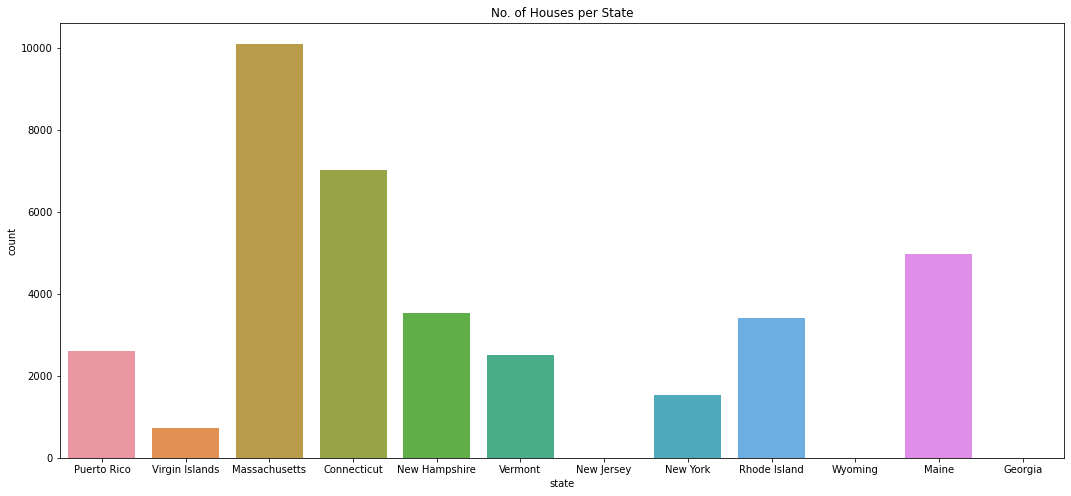

In [36]:
#Count of each state
fig = plt.figure(figsize = (18, 8))
sns.countplot(x="state", data=house)
house.loc[:,'state'].value_counts()
plt.title("No. of Houses per State")

Text(0.5, 1.0, 'The relation between number of Beds and price')

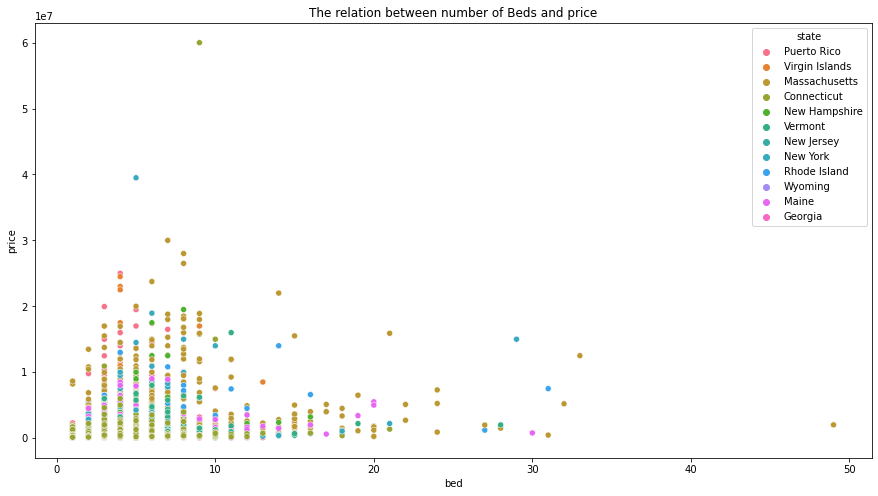

In [37]:
#Scatter plot between between number of beds and price

plt.figure(figsize=(15,8))

sns.scatterplot(data=house,x="bed",y="price",hue= 'state')
plt.title("The relation between number of Beds and price")

Text(0.5, 1.0, 'The relation between number of Bathrooms and price')

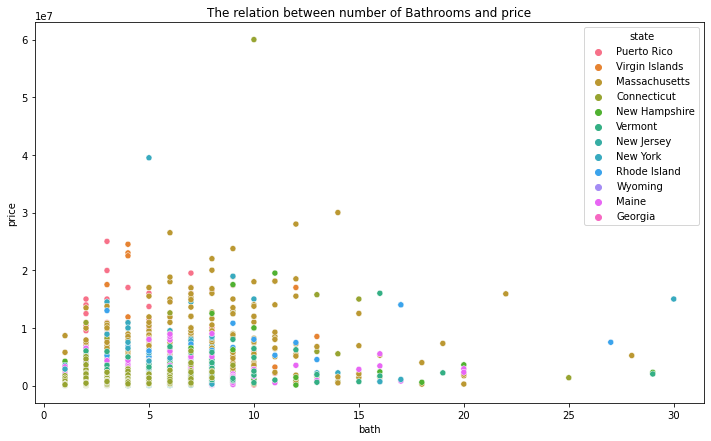

In [38]:
# Scatter plot between number of bathrooms and price 

plt.figure(figsize=(12,7))

sns.scatterplot(data=house,x="bath",y="price",hue='state')
plt.title("The relation between number of Bathrooms and price")

Text(0.5, 1.0, 'The relation between number of House size and price')

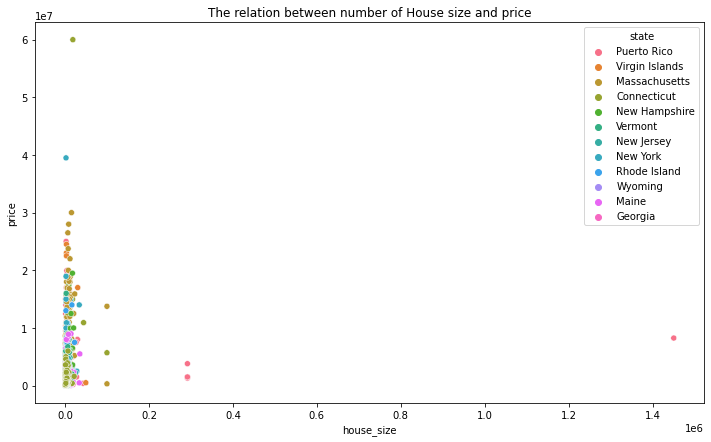

In [39]:
# Scatter plot between house size and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=house,x="house_size",y="price", hue= 'state')
plt.title("The relation between number of House size and price")

Text(0.5, 1.0, 'The relation between number of Plot Size and price')

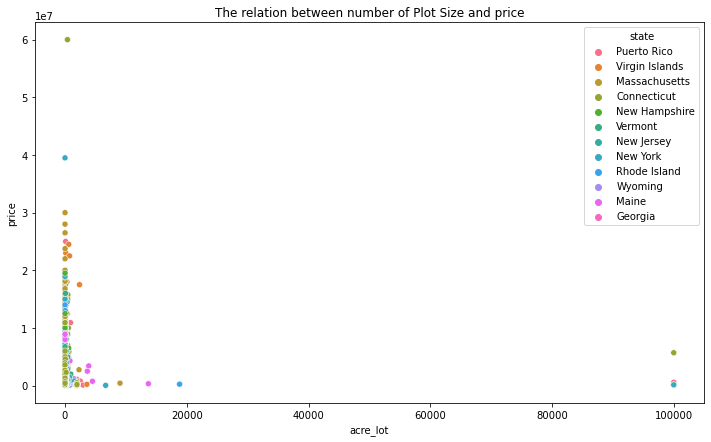

In [40]:
# Scatter plot between acre lot and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=house,x="acre_lot",y="price", hue= 'state')
plt.title("The relation between number of Plot Size and price")

Text(0.5, 1.0, 'Count of bathrooms')

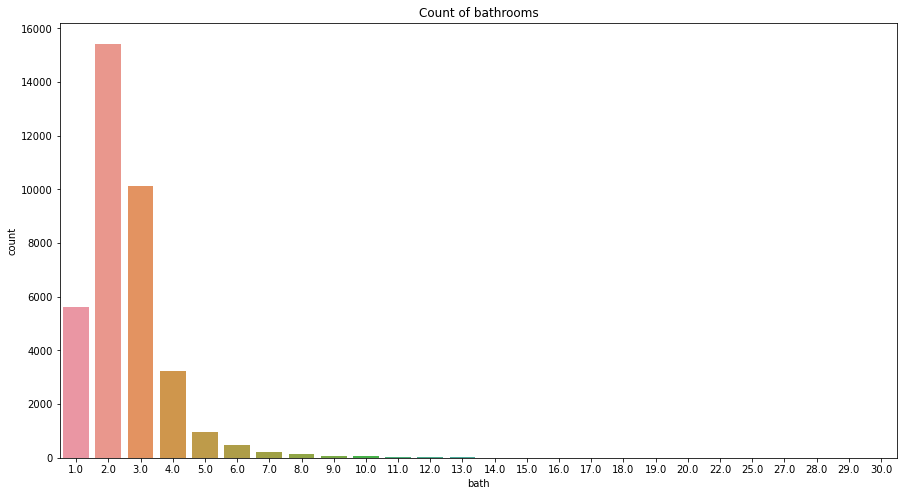

In [41]:
# count of bathrooms
fig = plt.figure(figsize = (15, 8))
sns.countplot(x="bath", data=house)
house.loc[:,'bath'].value_counts()
plt.title("Count of bathrooms")

Text(0.5, 1.0, 'Count of bedrooms')

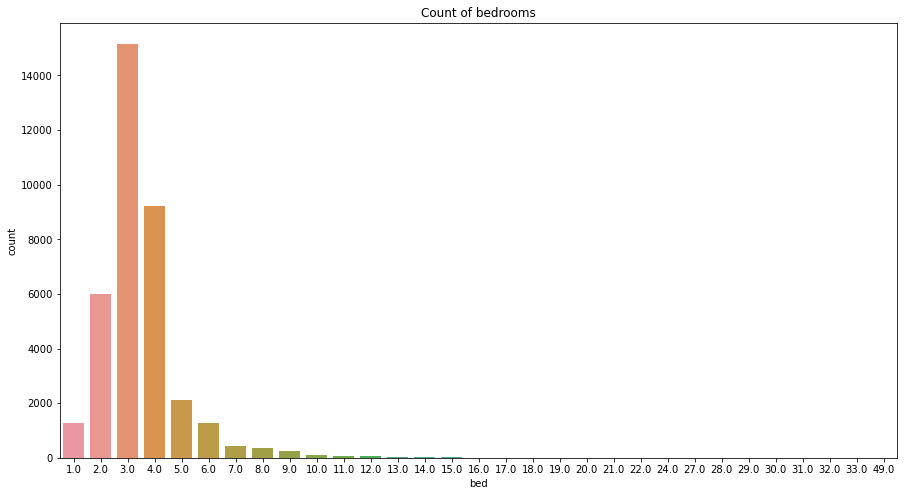

In [42]:
# count of bedrooms
fig = plt.figure(figsize = (15, 8))
sns.countplot(x="bed", data=house)
house.loc[:,'bed'].value_counts()
plt.title("Count of bedrooms")

In [43]:
def plot_histogram(data):
    
    data.select_dtypes(include=[int, float]).hist(bins=50, figsize=(20,20), log=True, color = "g", edgecolor='black')
    plt.show()

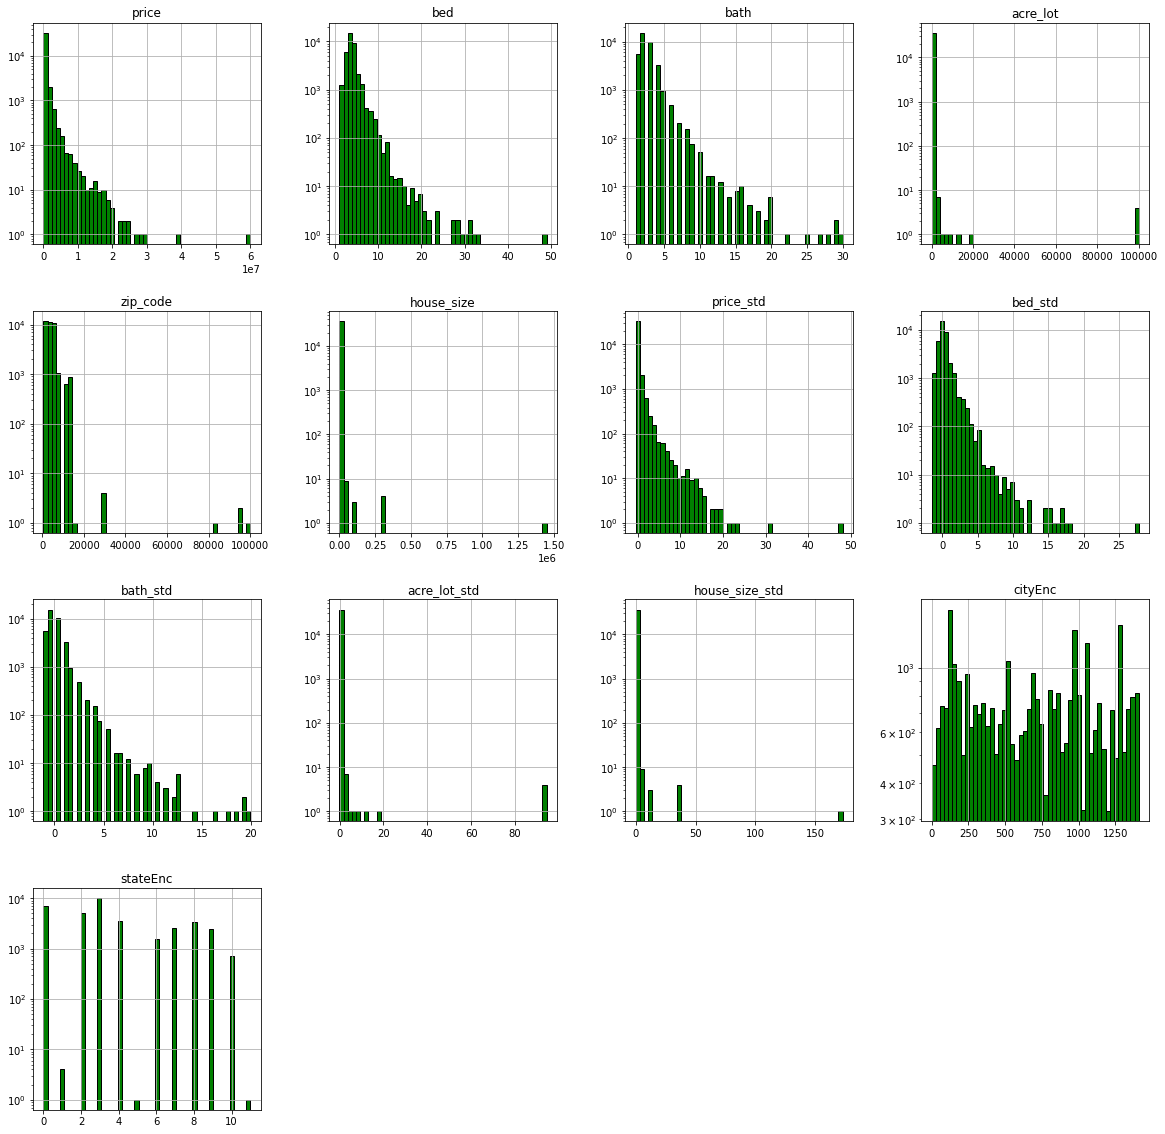

In [44]:
plot_histogram(house)

<AxesSubplot:title={'center':'Box plot of number of beds'}, xlabel='bed'>

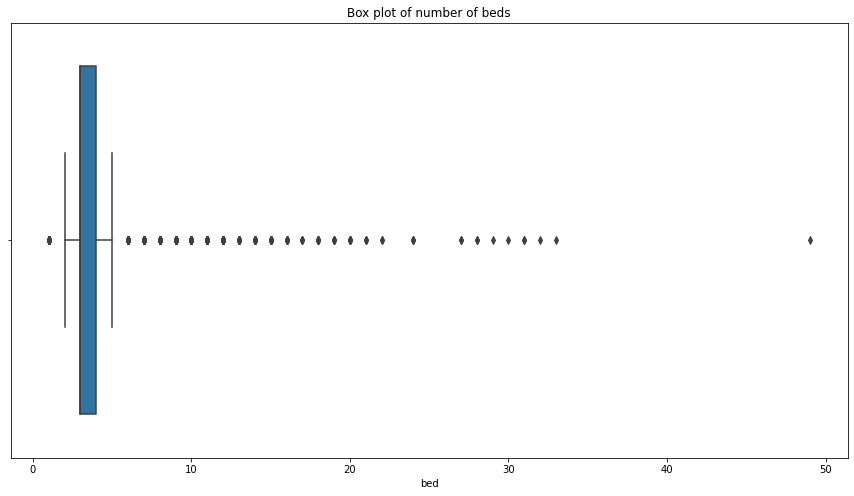

In [45]:
# Box plot of beds

plt.figure(figsize=(15,8))
plt.title("Box plot of number of beds")
sns.boxplot(x=house["bed"] )

<AxesSubplot:title={'center':'Box plot of baths'}, xlabel='bath'>

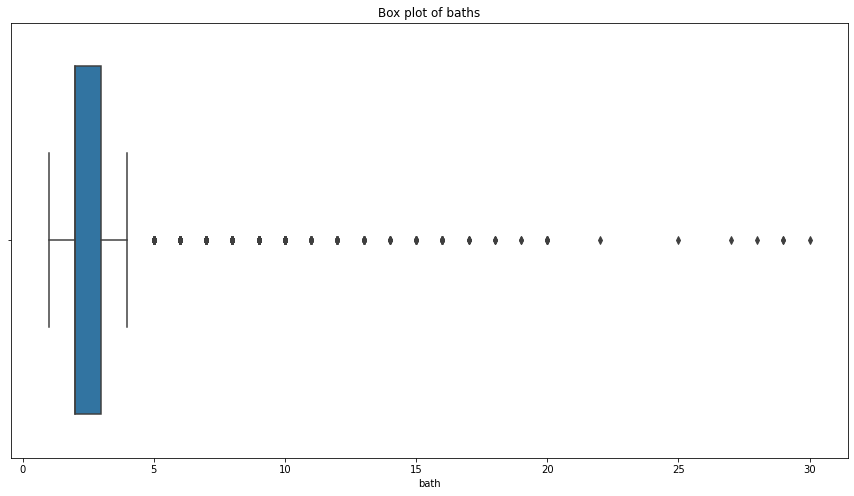

In [46]:
# Box plot of baths

plt.figure(figsize=(15,8))
plt.title("Box plot of baths")
sns.boxplot(x=house["bath"] )

<AxesSubplot:title={'center':'Box plot of house size'}, xlabel='house_size'>

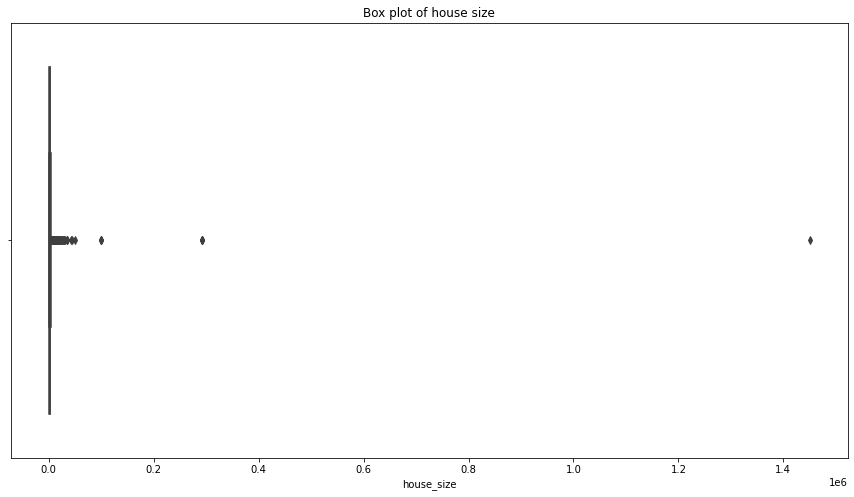

In [47]:
# Box plot of house size

plt.figure(figsize=(15,8))
plt.title("Box plot of house size")
sns.boxplot(x=house["house_size"] )

<AxesSubplot:title={'center':'Box plot of size of plot'}, xlabel='acre_lot'>

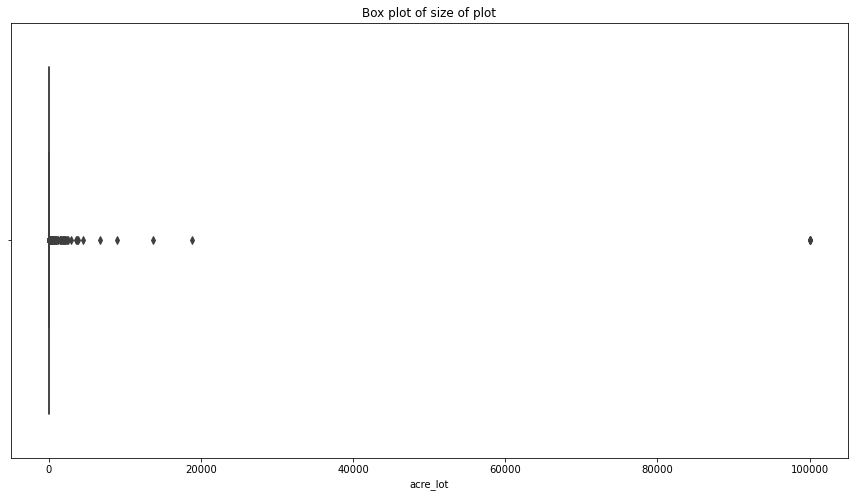

In [48]:
# Box plot of size of plot

plt.figure(figsize=(15,8))
plt.title("Box plot of size of plot")
sns.boxplot(x=house["acre_lot"] )

Text(0.5, 1.0, 'Relationship between size of the plot and size of the house')

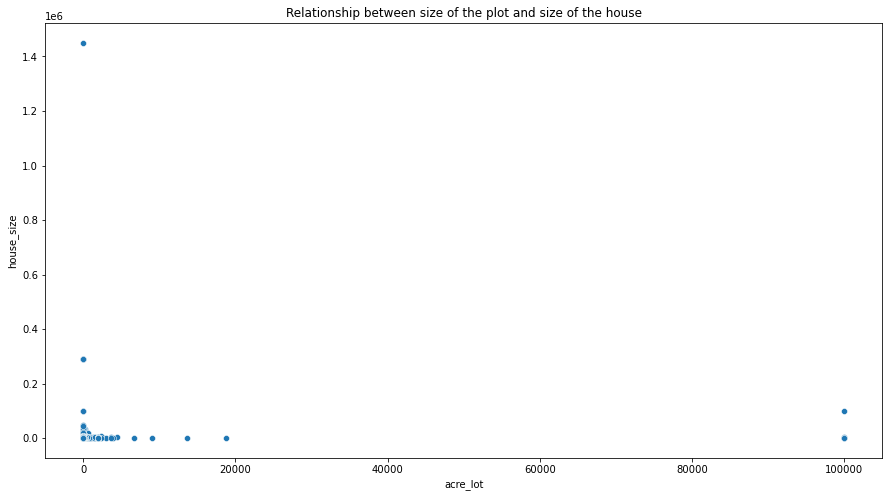

In [49]:
# Relationship between acre_lot and house_size


plt.figure(figsize=(15,8))

sns.scatterplot(data=house,x="acre_lot",y="house_size")
plt.title("Relationship between size of the plot and size of the house")

<AxesSubplot:title={'center':'Statewise Price Comparison'}, xlabel='state', ylabel='price'>

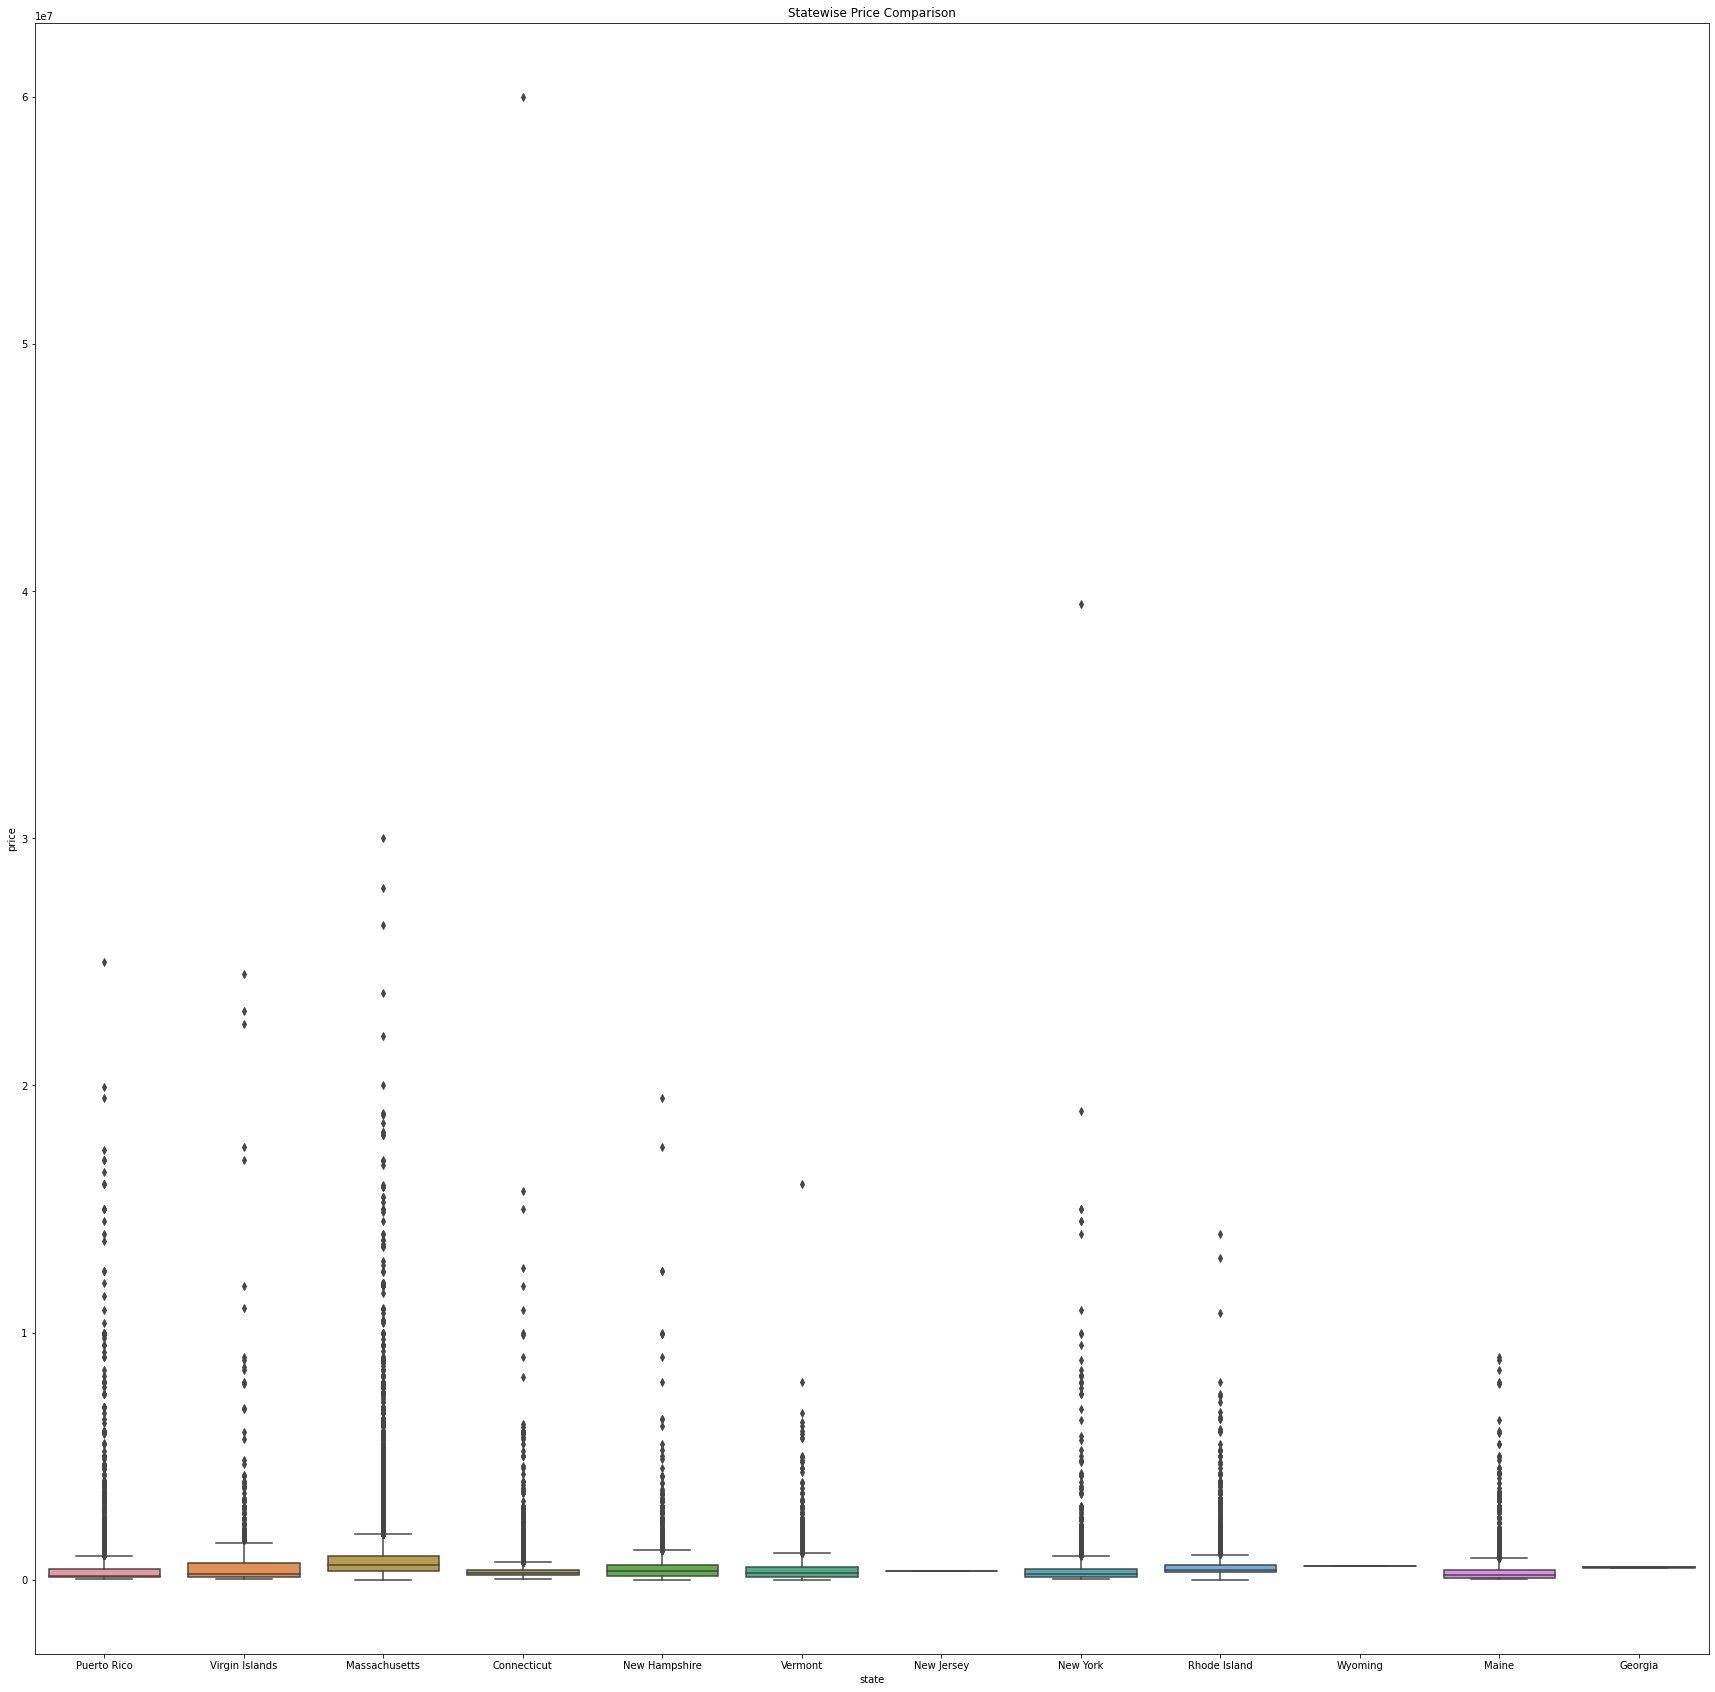

In [50]:
# Box plot of price per state
plt.figure(figsize=(30,30))
plt.title("Statewise Price Comparison")
sns.boxplot(data = house, x="state", y="price")



# Linear Regression

In [51]:
# Defining the x and y parameters for further regression analysis

var = ['bed_std', 'bath_std','house_size_std','cityEnc','stateEnc','acre_lot_std']
house_X = house[var]
house_y = house['price_std']

In [52]:
house_X.shape, house_y.shape

((36387, 6), (36387,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(house_X, house_y,     
    test_size = 0.3, random_state = 42 )

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train.values, y_train.values)

LinearRegression()

In [56]:
print("Coefficient of LR model :", model.coef_) 



Coefficient of LR model : [-8.77594945e-02  5.10603695e-01  4.55286126e-02 -8.22758256e-05
  2.23458932e-03  2.93018114e-02]


In [57]:
print("Intercept of LR model :", model.intercept_)

Intercept of LR model : 0.056011287588879195


In [58]:
# Linear Regression model prediction 

y_pred = model.predict(X_test.values)

In [59]:
# Test set residual 

e = y_test - y_pred

In [60]:
# Mean squared error of the test set

lr_mse_test = np.sum(np.square(e))/y_test.shape[0]
print("Mean Squared Error is",lr_mse_test)

Mean Squared Error is 0.5946120642919731


In [61]:
# Test set Mean absolute error

lr_mae_test = np.sum(np.abs(e))/y_test.shape[0]
print("Mean Absolute Error is",lr_mae_test)

Mean Absolute Error is 0.38484401721729156


In [62]:
lr_r_2  = model.score(X_test.values, y_test.values)

In [63]:
# R-squared of the test set

print("R-Sqaured Linear Regression:",model.score(X_test.values, y_test.values))

R-Sqaured Linear Regression: 0.2307954186399206


In [64]:
lr_results = [lr_mse_test ,lr_r_2]

In [65]:
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

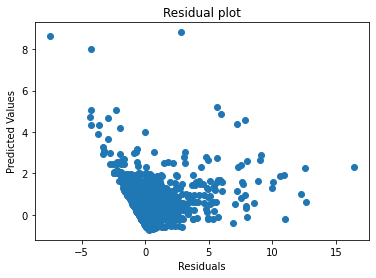

In [66]:
plt.scatter(e,y_pred)
plt.title("Residual plot")
plt.xlabel("Residuals")
plt.ylabel("Predicted Values")
plt.show()

# Polynomial Regression

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree = 2)


X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)


y_pred = lr.predict(X_test_poly)

e = y_pred - y_test
mse_poly = np.sum(e**2)/X_test.shape[0]


lr.intercept_, lr.coef_

(-6.248335182590381e-13,
 array([ 1.76386790e-13, -4.16722646e-14,  3.06505985e-14, -7.69623817e-15,
         1.46017123e-15,  1.00000000e+00, -1.21881811e-15,  1.63956598e-15,
         1.29074466e-15,  1.52916267e-15,  1.58910444e-16, -1.48673432e-16,
        -1.07023758e-14, -8.00187287e-16, -2.01188037e-15, -2.14575442e-16,
        -3.54986225e-16, -8.74590070e-17,  1.10742824e-16,  4.13275377e-18,
         1.13529124e-15, -2.34117250e-16, -8.86513392e-19, -3.85893499e-17,
         1.48159614e-17,  1.37139609e-16, -2.02421923e-16,  1.10846885e-16]))

In [135]:
R2_poly = lr.score(X_test_poly, y_test)
print('R squared poly:', R2_poly)

R squared poly: 1.0


In [140]:
poly_results = [mse_poly,R2_poly]
poly_results

[3.411641192720964e-26, 1.0]

# Polynomial Regression Hyperparameter tunning

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Defining the grid of the parameter

param_poly = {'polynomialfeatures__degree' : [3,4,5,6] }
poly_cv = make_pipeline(PolynomialFeatures() , LinearRegression())

# Defining GridSearchCV Estimation Function

grid_poly = GridSearchCV(poly_cv,  param_poly, cv = 5)



In [71]:
# Training the model 

grid_poly.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [3, 4, 5, 6]})

In [72]:
# Predicting test set values 

y_pred_test = grid_poly.predict(X_test)

In [73]:
print("Polynomial Regression intercept:",grid_poly.best_estimator_.named_steps['linearregression'].intercept_)


Polynomial Regression intercept: -0.10724901883491723


In [74]:
print("Polynomial Regression Coefficient:",grid_poly.best_estimator_.named_steps['linearregression'].coef_)

Polynomial Regression Coefficient: [ 3.09132853e-07 -2.39358398e-01 -4.60930430e-03  2.41441668e+00
 -6.18658911e-04  1.61725870e-01 -1.36932815e+00  6.15204485e-02
 -1.41880701e-01  1.57624602e-01  3.55800226e-04 -1.47007584e-02
  1.63081341e+00  1.34708244e-01  2.83122302e-01  1.73216698e-04
  1.65456848e-01  1.04443700e+00 -2.28848514e-01 -3.78923308e-03
 -2.14664714e-01 -1.93654371e+01  8.53409692e-07 -7.28654810e-06
  6.66227610e-03 -2.59728574e-02  3.97065386e-01 -1.95134162e-01
  4.33299673e-03 -8.75807575e-03 -5.03874117e-02 -9.04022337e-05
  1.80821535e-03  9.30807847e-02  1.43712028e-02  2.74584734e-02
  8.53079150e-05  6.17054458e-04  5.47790046e-01 -2.30401538e-01
  5.90729063e-04 -4.91719173e-02  4.38822961e+00 -3.95123008e-08
 -1.55447265e-05  2.40962830e-03  1.98969850e-03 -3.79728346e-01
 -1.30855357e+00 -1.04992565e-02  1.05635683e-04 -6.87415350e-05
 -2.06395455e-03 -3.43354296e-01  6.65349027e-02 -3.02312393e-04
  5.61859591e-02 -2.08174801e-01 -8.50804915e-08 -2.007

In [75]:
mse_tune_poly = np.sum((y_pred_test - y_test)**2)/y_pred_test.shape[0]
print('mse poly:', mse_tune_poly)

# Test set score 

R2_test_poly = grid_poly.score(X_test, y_test)
print('R squared poly:', R2_test_poly)



mse poly: 16120.690271442283
R squared poly: -20853.115743927163


In [76]:
# The best choice of degree

grid_poly.best_params_

{'polynomialfeatures__degree': 3}

In [77]:
grid_poly.cv_results_

pd.DataFrame(grid_poly.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100729,0.000948,0.013030,0.000609,3,{'polynomialfeatures__degree': 3},-1.578424e+06,-0.219737,-0.666951,-28.579985,-5.777224e+07,-1.187014e+07,2.295919e+07,1
1,0.277923,0.007300,0.022000,0.001673,4,{'polynomialfeatures__degree': 4},-1.814538e+10,-13.728210,-32.568719,-19335.051255,-2.516123e+12,-5.068537e+11,1.004659e+12,2
2,0.743343,0.015665,0.037084,0.001312,5,{'polynomialfeatures__degree': 5},-3.878222e+12,-7.712524,-283.892958,-185990.183806,-2.166137e+11,-8.189672e+11,1.531926e+12,4
3,1.985359,0.055844,0.076532,0.002862,6,{'polynomialfeatures__degree': 6},-2.628696e+12,-21.511023,-488.459965,-631.973788,-4.365334e+10,-5.344699e+11,1.047250e+12,3


In [141]:
poly_tune_results = [mse_poly,R2_test_poly]
poly_tune_results

[3.411641192720964e-26, -20853.115743927163]

# Ridge Regression

In [79]:

from sklearn.linear_model import Ridge


ridge = Ridge()


# train the model
ridge.fit(X_train, y_train)


y_pred_test = ridge.predict(X_test)

mse_ridge = np.sum((y_pred_test - y_test)**2)/y_pred_test.shape[0]
print('mse ridge:', mse_ridge)

R2_test_ridge = ridge.score(X_test, y_test)
print('R squared ridge:', R2_test_ridge)

mse ridge: 0.594610392054427
R squared ridge: 0.23079758188694977


In [80]:
ridge_results = [mse_ridge,R2_test_ridge]

# Ridge Regression Hyperparameter Tunning

In [81]:
from sklearn.linear_model import Ridge

param_ridge = { 'alpha':  [0.001, 0.01, 0.1, 10,100,1000,10000,1000000]  }


ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_ridge, cv = 5 )
grid_ridge.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 10, 100, 1000, 10000,
                                   1000000]})

In [82]:
print("Ridge regression Intercept:", grid_ridge.best_estimator_.intercept_)


Ridge regression Intercept: 0.052950234370983694


In [83]:
print("Ridge Regression Coefficient:",grid_ridge.best_estimator_.coef_)

Ridge Regression Coefficient: [ 2.18997279e-02  3.15777903e-01  4.56377510e-02 -8.80030807e-05
  4.07887832e-03  1.86546805e-02]


In [84]:
# prediction on test
y_pred_test = grid_ridge.predict(X_test)

In [85]:
mse_tune_ridge = np.sum((y_pred_test - y_test)**2)/y_pred_test.shape[0]
print('mse tuned ridge:', mse_ridge)

mse tuned ridge: 0.594610392054427


In [86]:
R2_tune_ridge = grid_ridge.score(X_test, y_test)
print('R squared ridge:', R2_tune_ridge)

R squared ridge: 0.21505967943660886


In [87]:
# Best choice of alpha

grid_ridge.best_params_

{'alpha': 10000}

In [88]:
grid_ridge.best_score_

0.1739130695765483

In [89]:
ridge_tune_results = [mse_tune_ridge,R2_tune_ridge]

# Lasso Regression

In [90]:
from sklearn.linear_model import Lasso

my_lasso = Lasso()

my_lasso.fit(X_train, y_train)

y_pred_test_lasso = my_lasso.predict(X_test)

mse_lasso = np.sum((y_pred_test_lasso - y_test)**2)/y_pred_test_lasso.shape[0]
print('mse lasso:', mse_lasso)

R2_test_lasso = my_lasso.score(X_test, y_test)
print('R squared lasso:', R2_test_lasso)

mse lasso: 0.7716390275118352
R squared lasso: 0.0017890474100954457


In [91]:
lasso_results = [mse_lasso,R2_test_lasso]

# Lasso Regression Hyper parameter tunning

In [92]:
from sklearn.linear_model import Lasso

param_lasso = { 'alpha':  [0.001, 0.01, 0.1, 10,100]  }
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_ridge, cv = 5 )
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 10, 100, 1000, 10000,
                                   1000000]})

In [93]:
# Best alpha value for Lasso Regression 
grid_lasso.best_params_

{'alpha': 0.1}

In [94]:
grid_lasso.cv_results_

pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009612,0.000555,0.003768,0.000608,0.001,{'alpha': 0.001},-0.194916,0.157068,0.185122,0.243822,0.218818,0.121983,0.161161,3
1,0.008122,0.000807,0.002903,0.000660,0.01,{'alpha': 0.01},0.010489,0.157992,0.182674,0.243344,0.217983,0.162497,0.081423,2
2,0.008287,0.000977,0.003081,0.000119,0.1,{'alpha': 0.1},0.181398,0.149404,0.169588,0.218803,0.214364,0.186711,0.026487,1
3,0.008698,0.000381,0.003229,0.000310,10,{'alpha': 10},0.000676,0.000247,0.000557,0.000511,0.000451,0.000488,0.000142,4
4,0.007620,0.000970,0.002924,0.000481,100,{'alpha': 100},-0.000014,-0.000077,-0.000160,-0.000189,-0.000615,-0.000211,0.000211,5
5,0.008530,0.000362,0.003145,0.000433,1000,{'alpha': 1000},-0.000014,-0.000077,-0.000160,-0.000189,-0.000615,-0.000211,0.000211,5
6,0.008773,0.000260,0.002931,0.000356,10000,{'alpha': 10000},-0.000014,-0.000077,-0.000160,-0.000189,-0.000615,-0.000211,0.000211,5
7,0.008160,0.000729,0.003079,0.000158,1000000,{'alpha': 1000000},-0.000014,-0.000077,-0.000160,-0.000189,-0.000615,-0.000211,0.000211,5


In [95]:
print("Lasso Regression Intercept:",grid_lasso.best_estimator_.intercept_)


Lasso Regression Intercept: 0.06783554932946373


In [96]:
print("Lasso Regression Coefficient:",grid_lasso.best_estimator_.coef_)

Lasso Regression Coefficient: [ 0.00000000e+00  3.61545795e-01  0.00000000e+00 -8.69641891e-05
  0.00000000e+00  0.00000000e+00]


In [97]:
y_pred_test = grid_lasso.predict(X_test)

In [98]:
mse_tune_lasso = np.sum((y_pred_test - y_test)**2)/y_pred_test.shape[0]
print('mse lasso:', mse_lasso)

mse lasso: 0.7716390275118352


In [99]:
# Final model performance on Test set
print("Model Performance",grid_lasso.score(X_test, y_test))

Model Performance 0.22268864790587684


In [100]:
R2_tune_lasso = grid_lasso.score(X_test, y_test)

In [101]:
lasso_tune_results = [mse_tune_lasso,R2_tune_lasso]

In [102]:
# showing all models result
dic = {
    'Metrics':['RMSE','R2_Score'],
    'LassoTune':lasso_tune_results,
    'Lasso': lasso_results,
    'Ridge': ridge_results,
    'RidgeTune':ridge_tune_results,
    'Polynomial': poly_results,
    'PolynomialTune':poly_tune_results,
    'Linear Regression':lr_results
    
    
}
metrics_df = pd.DataFrame(dic)

metrics_df1 = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df1.T, headers = 'keys', tablefmt = 'psql'))

+-------------------+----------+-----------------+
|                   |     RMSE |        R2_Score |
|-------------------+----------+-----------------|
| LassoTune         | 0.600879 |      0.222689   |
| Lasso             | 0.771639 |      0.00178905 |
| Ridge             | 0.59461  |      0.230798   |
| RidgeTune         | 0.606776 |      0.21506    |
| Polynomial        | 9.06195  |    -10.7228     |
| PolynomialTune    | 9.06195  | -20853.1        |
| Linear Regression | 0.594612 |      0.230795   |
+-------------------+----------+-----------------+


In [103]:
metrics_df.iloc[1].tolist()

['R2_Score',
 0.22268864790587684,
 0.0017890474100954457,
 0.23079758188694977,
 0.21505967943660886,
 -10.722756816052929,
 -20853.115743927163,
 0.2307954186399206]

# Logistic Regression

In [104]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [105]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(model,predictions, y_test_set, model_name):    
    """
    In modelEvaluation function we are doing all the things that given below:
    - checking the accuracy of model
    - checking the precision of model
    - checking the recall of model 
    - checking the f1-score of model
    - checking confusion matrix
    - checking classification report
    """
    # Print model evaluation to predicted result    
    print("="*100)
    print("\t\t", model_name)
    print("="*100)
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))  
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    
    print("="*30)
    print ("\tConfusion Matrix",)
    print("="*30)
    cm = confusion_matrix(y_test_set, predictions)
    print(cm)
    results = [accuracy_score(y_test_set, predictions)]
    return results

In [106]:
def model_building(model_object, X_train, X_test, y_train, y_test):
    # lets fit the model object
    model_object.fit(X_train, y_train)
    # predicting the model
    predictions = model_object.predict(X_test)
    # checking the results of model
    results = modelEvaluation(model_object,predictions, y_test, model_object)
    return results

In [107]:
house["statusEnc"] = LB.fit_transform(house["status"])

In [108]:
house.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,price_std,bed_std,bath_std,acre_lot_std,house_size_std,cityEnc,stateEnc,statusEnc
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.000000,-0.410354,-0.286583,-0.394987,-0.022760,-0.165648,8,7,0
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.000000,-0.430589,0.324236,-0.394987,-0.022798,-0.093160,8,7,0
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.000000,-0.441111,-0.897402,-1.121307,-0.022731,-0.186188,602,7,0
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.000000,-0.377979,0.324236,-0.394987,-0.022779,-0.060559,965,7,0
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,2004.533333,-0.442730,1.545874,-0.394987,-0.022826,-0.036134,720,7,0


In [109]:
v = ['bed_std', 'bath_std','house_size_std','cityEnc','stateEnc','acre_lot_std','price_std']
X = house[var]
y = house['stateEnc']

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [111]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.3, random_state = 42)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)


X_train dimension=  (25470, 6)
X_test dimension=  (10917, 6)
y_train dimension=  (25470,)
y_train dimension=  (10917,)


In [112]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

Classification Report
Classification report is used to measure the quality of prediction from classification algorithm

* Precision: Indicates how many classes are correctly classified
* Recall: Indicates what proportions of actual positives was identified correctly
* F-Score: It is the harmonic mean between precision & recall
* Support: It is the number of occurrence of the given class in our dataset

In [113]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2128
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00      1494
           3       0.47      1.00      0.64      3034
           4       0.00      0.00      0.00       990
           6       0.00      0.00      0.00       463
           7       0.35      0.05      0.09       781
           8       0.62      0.83      0.71      1042
           9       0.75      0.74      0.75       763
          10       0.26      0.05      0.09       220

    accuracy                           0.61     10917
   macro avg       0.34      0.37      0.33     10917
weighted avg       0.47      0.61      0.50     10917



In [114]:
params = { 
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']}
logistic_grid_search = GridSearchCV(estimator = lm, param_grid = params, cv =5)
logistic_grid_search = logistic_grid_search.fit(X_train, y_train)

In [115]:
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",logistic_grid_search.best_estimator_)
    print("\n The best score across ALL searched params:\n",logistic_grid_search.best_score_)
    print("\n The best parameters across ALL searched params:\n",logistic_grid_search.best_params_)
    print("\n The best test accuracy ALL searched params:\n",logistic_grid_search.score(X_test, y_test))

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10, multi_class='ovr', penalty='l1', solver='liblinear')

 The best score across ALL searched params:
 0.6287396937573616

 The best parameters across ALL searched params:
 {'C': 10, 'penalty': 'l1'}

 The best test accuracy ALL searched params:
 0.638636988183567


In [116]:
results_lm = model_building(lm,  X_train, X_test, y_train, y_test)

		 LogisticRegression(multi_class='ovr', solver='liblinear')

Accuracy on validation set: 0.6091

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2128
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00      1494
           3       0.47      1.00      0.64      3034
           4       0.00      0.00      0.00       990
           6       0.00      0.00      0.00       463
           7       0.35      0.05      0.09       781
           8       0.62      0.83      0.71      1042
           9       0.75      0.74      0.75       763
          10       0.26      0.05      0.09       220

    accuracy                           0.61     10917
   macro avg       0.34      0.37      0.33     10917
weighted avg       0.47      0.61      0.50     10917

	Confusion Matrix
[[2128    0    0    0    0    0    0    0    0    0]
 [   0    0    0    2    0    0    0    0    0

In [117]:
results_lm_grid = model_building(logistic_grid_search,  X_train, X_test, y_train, y_test)

		 GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']})

Accuracy on validation set: 0.6311

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2128
           1       0.00      0.00      0.00         2
           2       0.96      0.02      0.03      1494
           3       0.47      1.00      0.64      3034
           4       0.09      0.00      0.00       990
           6       0.00      0.00      0.00       463
           7       0.28      0.04      0.07       781
           8       0.64      0.84      0.73      1042
           9       0.97      0.79      0.87       763
          10       1.00      0.91      0.95       220

    accuracy                           0.63     10917
   macro avg       0.54      0.46

# KNN 

In [118]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
  
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 


0.9504232164449818


In [119]:
from sklearn.model_selection import GridSearchCV

# define function
base_knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': range(2, 15, 1)}  

#apply grid search
grid_knn = GridSearchCV(base_knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train) 



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 15)})

In [120]:
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_knn.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_knn.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_knn.best_params_)
    print("\n The best test accuracy ALL searched params:\n",grid_knn.score(X_test, y_test))

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(n_neighbors=2)

 The best score across ALL searched params:
 0.9816782704287285

 The best parameters across ALL searched params:
 {'n_neighbors': 2}

 The best test accuracy ALL searched params:
 0.9854897218863361


In [121]:
results_knn = model_building(knn,  X_train, X_test, y_train, y_test)

		 KNeighborsClassifier(n_neighbors=10)

Accuracy on validation set: 0.9504

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1732
           1       0.00      0.00      0.00         2
           2       0.93      0.90      0.92      1248
           3       0.93      0.96      0.94      2515
           4       0.93      0.89      0.91       833
           6       0.93      0.91      0.92       401
           7       0.96      0.98      0.97       660
           8       0.96      1.00      0.98       878
           9       0.97      0.89      0.93       646
          10       0.99      0.99      0.99       182

    accuracy                           0.95      9097
   macro avg       0.86      0.85      0.85      9097
weighted avg       0.95      0.95      0.95      9097

	Confusion Matrix
[[1722    0    7    3    0    0    0    0    0    0]
 [   1    0    1    0    0    0    0    0    0    0]
 [  17    0 11

In [122]:
results_knn_grid = model_building(grid_knn,  X_train, X_test, y_train, y_test)

		 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 15)})

Accuracy on validation set: 0.9855

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00         2
           2       0.98      0.98      0.98      1248
           3       0.98      0.99      0.98      2515
           4       0.98      0.96      0.97       833
           6       0.99      0.97      0.98       401
           7       0.99      1.00      0.99       660
           8       0.99      1.00      0.99       878
           9       1.00      0.96      0.98       646
          10       1.00      1.00      1.00       182

    accuracy                           0.99      9097
   macro avg       0.99      0.99      0.99      9097
weighted avg       0.99      0.99      0.99      9097

	Confusion Matrix
[[1730    0    1    1    0    0    0    0    0   

# Decision Trees

In [123]:
from sklearn.model_selection import train_test_split

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42)

In [124]:
from sklearn.tree import DecisionTreeClassifier

# A Basic Tree

clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Train the Model
clf_tree.fit(X_train, y_train)

# Obtain and print accuracy
clf_tree.score(X_test, y_test)

1.0

In [125]:
clf_tree.feature_importances_

array([0., 0., 0., 0., 1., 0.])

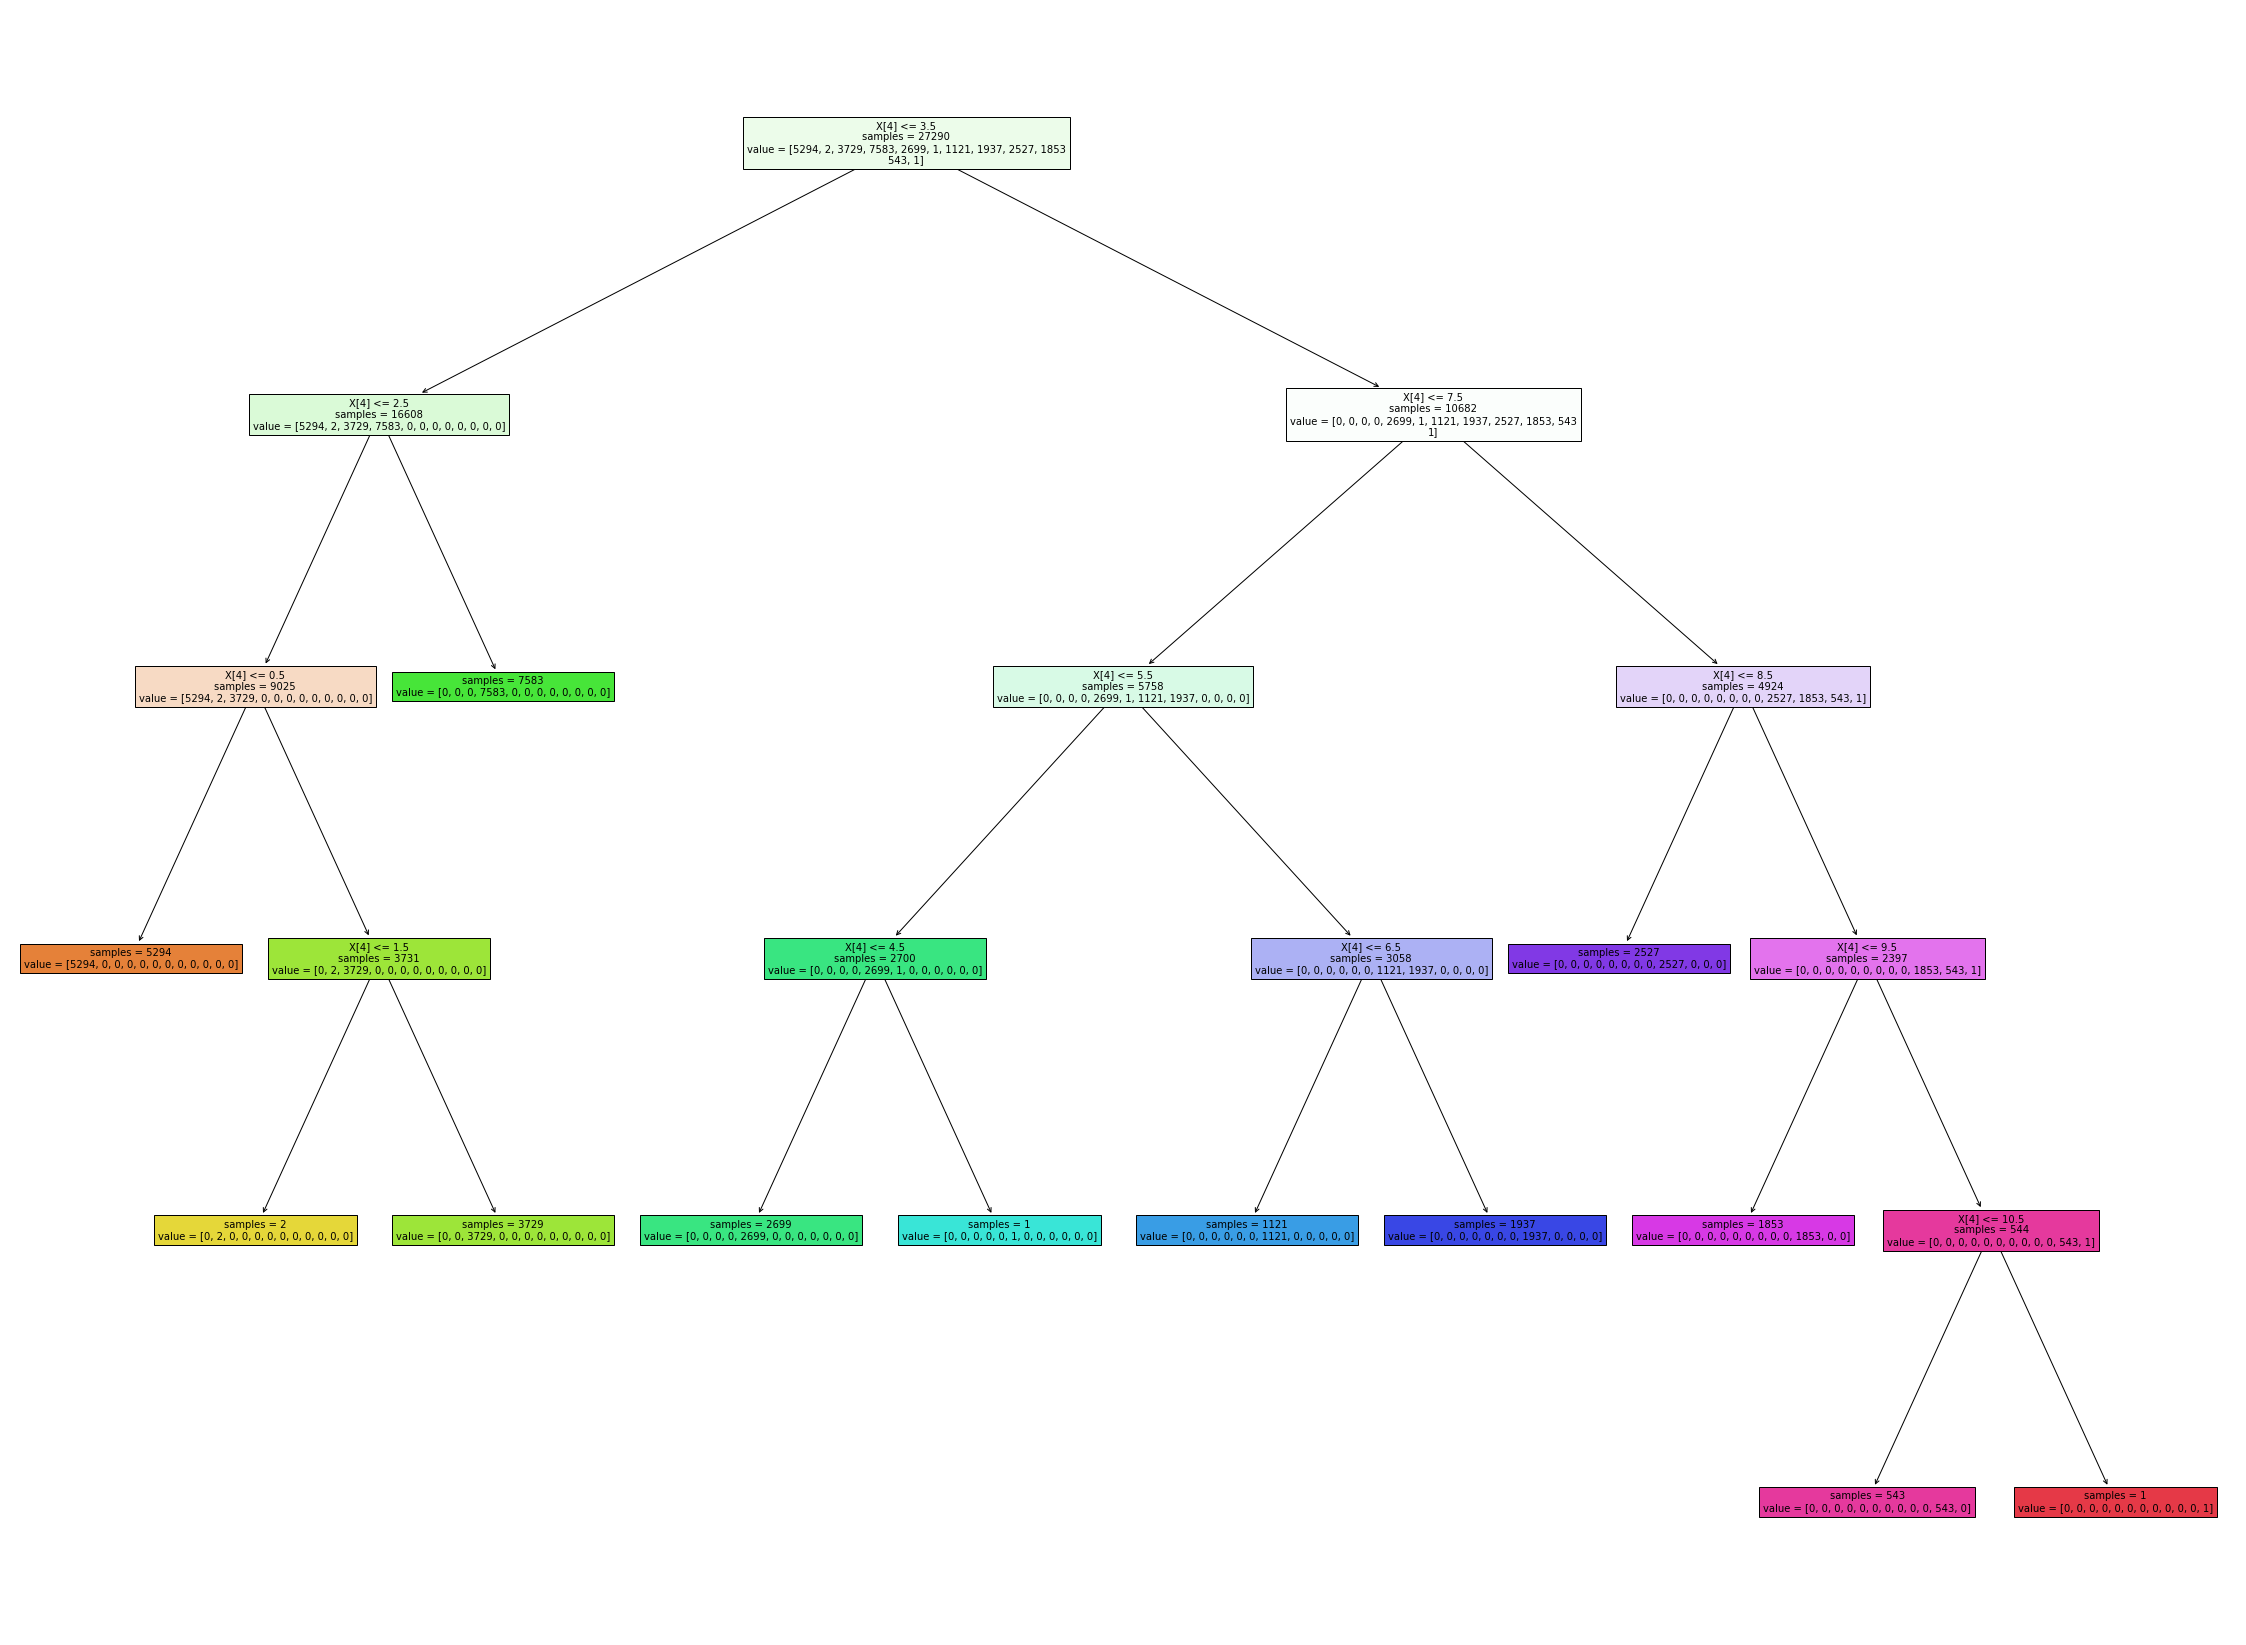

In [126]:
# Plot the decision tree
from sklearn import tree

# set a proper figure size (in case that the figure is too small to read or ratio is not proper)
fig = plt.figure(figsize=(40,30))

tree.plot_tree(clf_tree, 
               filled = True, # whether to color the boxes
               impurity = False, # whether to report gini index
               fontsize = 10) # set fontsize to read
plt.show()

# save the figure to read through the boxes, it is saved under the same directory as the coding doc.
fig.savefig("decision_tree_basic.jpg")

In [127]:
# GridSearch
from sklearn.model_selection import GridSearchCV

# Define Function
opt_tree = DecisionTreeClassifier(random_state = 42)

# Define all potential hyperparameters (this time, specify three different hyperparameters)
DT_params = {'max_depth': range(1,10), 
             'min_samples_split': range(2, 11),
             'max_leaf_nodes': range(2, 11)}

# Define GridSearchCV
grid_tree = GridSearchCV(opt_tree, DT_params)

# Train the model, and report accuracy
grid_tree.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [128]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)
print("\n The best test accuracy ALL searched params:\n",grid_tree.score(X_test, y_test))

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=42)

 The best score across ALL searched params:
 0.9999267130817149

 The best parameters across ALL searched params:
 {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 2}

 The best test accuracy ALL searched params:
 1.0


In [129]:
print(metrics.classification_report(y_test, grid_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00      1248
           3       1.00      1.00      1.00      2515
           4       1.00      1.00      1.00       833
           6       1.00      1.00      1.00       401
           7       1.00      1.00      1.00       660
           8       1.00      1.00      1.00       878
           9       1.00      1.00      1.00       646
          10       1.00      1.00      1.00       182

    accuracy                           1.00      9097
   macro avg       1.00      1.00      1.00      9097
weighted avg       1.00      1.00      1.00      9097



In [130]:
results_decision = model_building(clf_tree,  X_train, X_test, y_train, y_test)

		 DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00      1248
           3       1.00      1.00      1.00      2515
           4       1.00      1.00      1.00       833
           6       1.00      1.00      1.00       401
           7       1.00      1.00      1.00       660
           8       1.00      1.00      1.00       878
           9       1.00      1.00      1.00       646
          10       1.00      1.00      1.00       182

    accuracy                           1.00      9097
   macro avg       1.00      1.00      1.00      9097
weighted avg       1.00      1.00      1.00      9097

	Confusion Matrix
[[1732    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0   

In [131]:
results_decision_grid = model_building(grid_tree,  X_train, X_test, y_train, y_test)

		 GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

Accuracy on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00      1248
           3       1.00      1.00      1.00      2515
           4       1.00      1.00      1.00       833
           6       1.00      1.00      1.00       401
           7       1.00      1.00      1.00       660
           8       1.00      1.00      1.00       878
           9       1.00      1.00      1.00       646
          10       1.00      1.00      1.00       182

    accuracy                           1.00      9097
   macro avg       1.00      1.00      1.00      9

In [132]:
dic = {
    'Metrics':['accuracy'],
    'KNN':results_knn,
    'KNN Tune':results_knn_grid,
    'Logistic Regression':results_lm,
    'Logistic Regression Tune':results_lm_grid,
    'Decision Tree':results_decision,
    'Decision Tree Tune':results_decision_grid,
    
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+--------------------------+------------+
|                          |   accuracy |
|--------------------------+------------|
| KNN                      |   0.950423 |
| KNN Tune                 |   0.98549  |
| Logistic Regression      |   0.609142 |
| Logistic Regression Tune |   0.631126 |
| Decision Tree            |   1        |
| Decision Tree Tune       |   1        |
+--------------------------+------------+


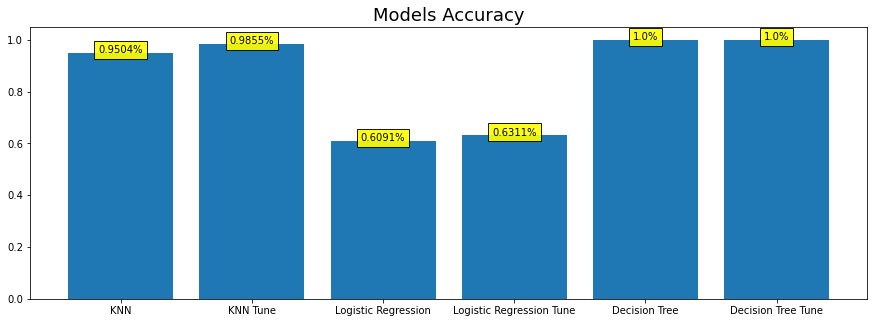

In [133]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()